# 앙상블
- 하나의 단일 모델로 성능이 높지 않을 경우 다수의 모델을 사용하는 기법
- 앙상블은 voting과 bagging으로 나눠진다.

## bagging
- 같은 모델을 다수 두고 다른 형태의 데이터를 학습 시키는 방법
- 우리가 지금까지 살펴본 앙상블, 부스팅 알고리즘은 모두 bagging이다.

## voing
- 다른 모델을 다수 두고 같은 형태의 데이터를 학습 시키는 방법
- sklearn에서 voting 을 제공한다.

## 선정방식
- hard voting : 각 알고리즘이 던지는 결과를 취합하여 다수결로 결정한다.
- soft voting : 각 알고리즘이 던지는 정답 확률을 취합하여 확률이 가장 높은 걸로 결정한다.
- 지금까지 배운 앙상블, 부스팅 알고리즘들은 soft voting을 사용한다.


In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 시간 측정을 위한 시간 모듈
import datetime

# 분류

### 학습을 위한 사전 작업


In [2]:
# 데이터 불러오기
df1 = pd.read_csv('data/breast_cancer.csv')

# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

# 인코딩
encoder1 = LabelEncoder()
encoder1.fit(y)
y = encoder1.transform(y)

# 입력 데이터에 대한 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)

display(X)
display(y)

array([[ 1.0716471 , -2.11021126,  1.24691885, ...,  2.21627442,
         2.57629265,  1.89296305],
       [ 1.80872514, -0.29975355,  1.665741  , ...,  1.02843583,
        -0.29491256,  0.27048275],
       [ 1.55731868,  0.55280299,  1.54548514, ...,  1.88116631,
         1.04374227,  0.19229093],
       ...,
       [ 1.52874976,  1.47150615,  1.4501098 , ...,  0.43900458,
        -1.00379467, -1.25588676],
       [-0.63963097,  2.26281581, -0.66183197, ..., -0.68959168,
        -0.76491536, -0.11396037],
       [ 0.0831626 , -1.22825622,  0.04684827, ..., -0.15491471,
        -0.51828023, -0.32247189]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### 기본 모델 사용
- 각 모델별 최적의 하이퍼 파라미터 사용


In [3]:
model1 = KNeighborsClassifier(n_neighbors=9)
model2 = LogisticRegression(penalty='l2', C=0.1)
#probability=True:softVoting에서 꼭 필요함 
model3 = SVC(C=1, probability=True) 
model4 = DecisionTreeClassifier(max_depth=4)
model5 = RandomForestClassifier(max_depth=10, n_estimators=150)
model6 = AdaBoostClassifier(learning_rate=1, n_estimators=300)
model7 = GradientBoostingClassifier(learning_rate=1, n_estimators=150)
model8 = LGBMClassifier(learning_rate=0.1, n_estimators=100)
model9 = XGBClassifier(silent=True, verbosity=0, booster='gblinear', learning_rate=0.01, n_estimators=250)


In [4]:
#교차 검증
kfold=KFold(n_splits=10,shuffle=True,random_state=1)

r1= cross_val_score(model1,X,y,scoring='f1',cv=kfold)
r2= cross_val_score(model2,X,y,scoring='f1',cv=kfold)
r3= cross_val_score(model3,X,y,scoring='f1',cv=kfold)
r4= cross_val_score(model4,X,y,scoring='f1',cv=kfold)
r5= cross_val_score(model5,X,y,scoring='f1',cv=kfold)
r6= cross_val_score(model6,X,y,scoring='f1',cv=kfold)
r7= cross_val_score(model7,X,y,scoring='f1',cv=kfold)
r8= cross_val_score(model8,X,y,scoring='f1',cv=kfold)
r9= cross_val_score(model9,X,y,scoring='f1',cv=kfold)

In [5]:
print(r1.mean())
print(r2.mean())
print(r3.mean())
print(r4.mean())
print(r5.mean())
print(r6.mean())
print(r7.mean())
print(r8.mean())
print(r9.mean())


0.9591007420419185
0.9688344223775708
0.953985332295529
0.92557923895295
0.9493066253375609
0.962946361239335
0.9509705171100464
0.9494792940527012
0.968045891911621


# Voting 사용

In [6]:
# 사용할 알고리즘들..
model_list = [
    ('model1', model1), ('model2', model2), ('model3', model3),
    ('model4', model4), ('model5', model5), ('model6', model6),
    ('model7', model7), ('model8', model8), ('model9', model9),
]


In [7]:
#하드보팅
model10= VotingClassifier(estimators=model_list,voting='hard')

r10=cross_val_score(model10,X,y,scoring='f1',cv=kfold)
r10.mean()

0.9605732001466073

In [8]:
#소프트 보팅
model11=VotingClassifier(estimators=model_list,voting='soft')

r11=cross_val_score(model11, X, y, scoring='f1', cv=kfold)
r11.mean()


0.9573535031769105

In [9]:
model10.fit(X, y)
model11.fit(X, y)


VotingClassifier(estimators=[('model1', KNeighborsClassifier(n_neighbors=9)),
                             ('model2', LogisticRegression(C=0.1)),
                             ('model3', SVC(C=1, probability=True)),
                             ('model4', DecisionTreeClassifier(max_depth=4)),
                             ('model5',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=150)),
                             ('model6',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=300)),
                             ('model7',
                              GradientBoosti...
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max_delta_step=None, max_depth=None,
                                            m

### 학습데이터를 넣어서 검증을 한다.

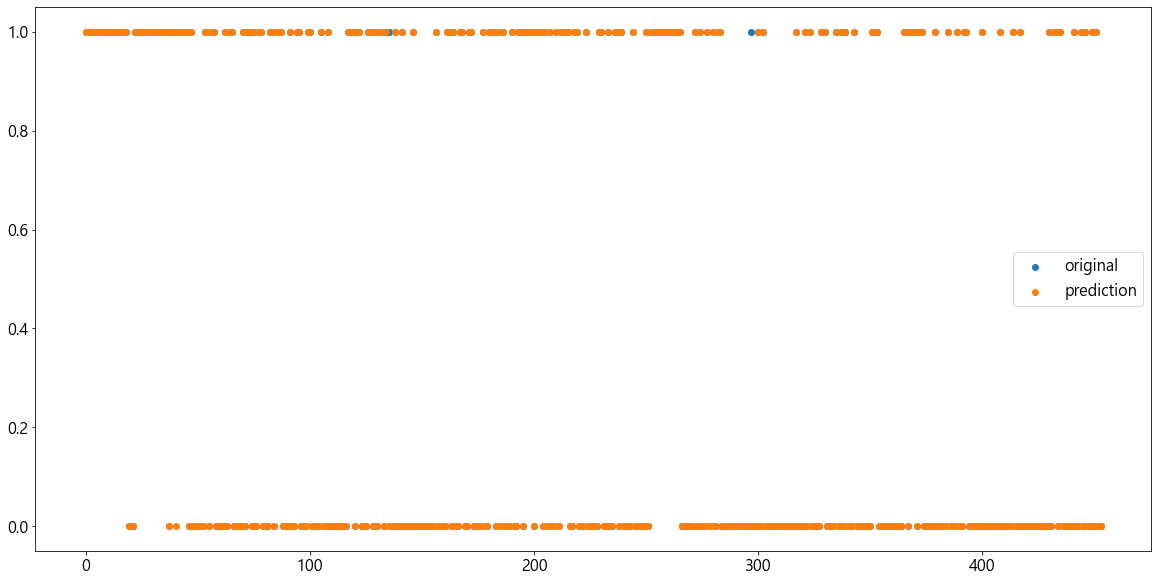

In [10]:
# 예측결과를 시각화 해본다.
y_pred10 =model10.predict(X)

plt.scatter(list(range(len(y))), y, label='original')
plt.scatter(list(range(len(y_pred10))), y_pred10, label='prediction')
plt.legend()
plt.show()

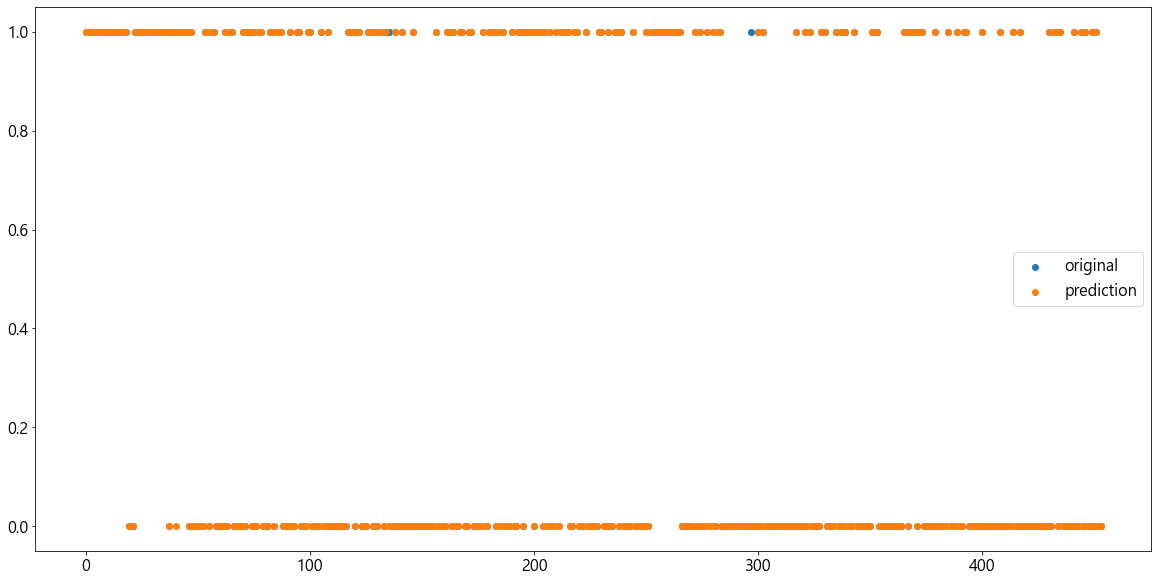

In [11]:
# 예측결과를 시각화 해본다.
y_pred11 =model11.predict(X)

plt.scatter(list(range(len(y))), y, label='original')
plt.scatter(list(range(len(y_pred11))), y_pred11, label='prediction')
plt.legend()
plt.show()

In [15]:
# # 결과 확률
# proba_a1 = model10.predict_proba(X)

# # 0일 확률들
# a10 = proba_a1[:, 0]
# # 1일 확률들
# a11 = proba_a1[:, 1]

# plt.scatter(list(range(len(a10))), a10, label='0일 확률')
# plt.scatter(list(range(len(a11))), a11, label='1일 확률')
# plt.legend()
# plt.show()


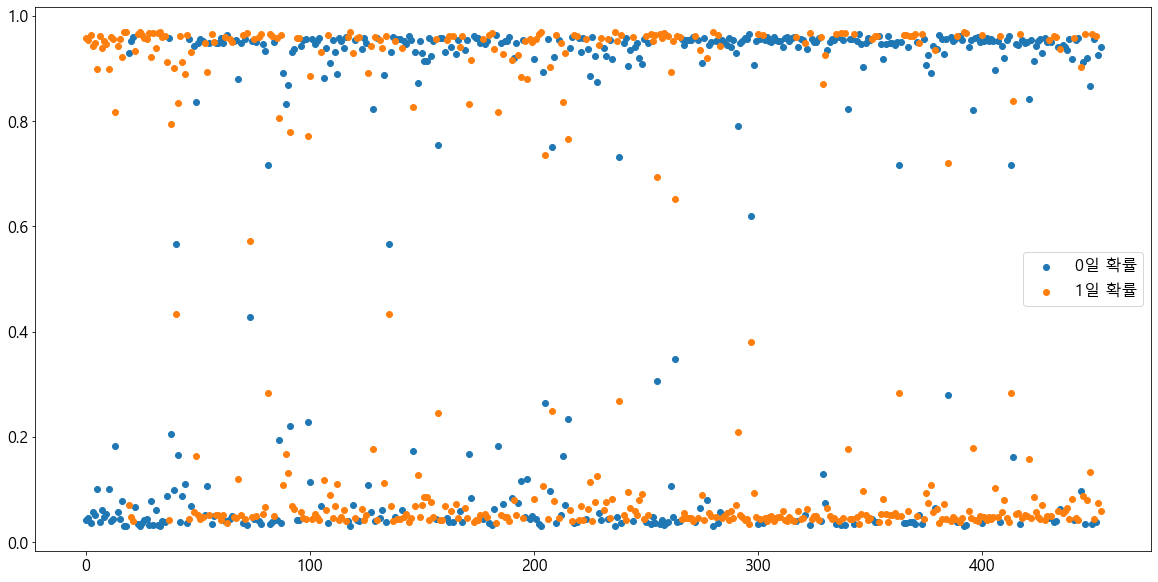

In [13]:
# 결과 확률
proba_a1 = model11.predict_proba(X)

# 0일 확률들
a10 = proba_a1[:, 0]
# 1일 확률들
a11 = proba_a1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.legend()
plt.show()


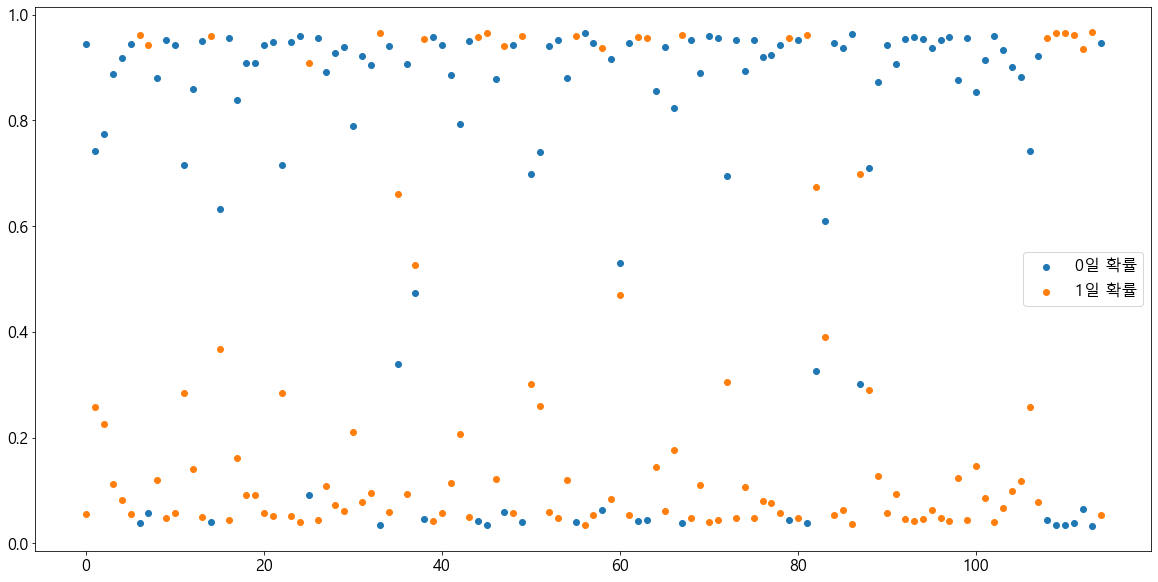

저장완료


In [14]:
df2 = pd.read_csv('data/breast_cancer_new.csv')

# 데이터 표준화
scaled_data = scaler1.transform(df2)

# 결과를 예측한다.
y_pred1 = model10.predict(scaled_data)
y_pred2 = model11.predict(scaled_data)


#HardVoting은 확률그래프X

# 예측 확률을 시각화한다.
proba_data = model11.predict_proba(scaled_data)

# 0일확률과 1일 확률 값을 각각 가져온다.
a10 = proba_data[:, 0]
a11 = proba_data[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.legend()
plt.show()




# 결과 데이터를 복원한다.
result_data1 = encoder1.inverse_transform(y_pred1)
result_data2 = encoder1.inverse_transform(y_pred2)



# 결과를 저장한다.
df2['target'] = result_data1
df2.to_csv('data/breast_cancer_HardVoting.csv')


df2['target'] = result_data2
df2.to_csv('data/breast_cancer_SoftVoting.csv')



print('저장완료')


# 회귀

### 학습을 위한 데이터 처리

In [16]:
df1 = pd.read_csv('data/boston.csv')

X = df1.drop('target', axis=1)
y = df1['target']

# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)

display(X)
display(y)


array([[-0.63326028,  0.12485095, -1.03628034, ..., -1.07088823,
         0.41031054, -0.92655695],
       [-0.60097475, -0.58885279, -0.25831126, ...,  0.06047401,
         0.41031054, -0.22972861],
       [-0.60100552, -0.58885279, -0.25831126, ...,  0.06047401,
         0.31149419, -1.08568842],
       ...,
       [-0.56479774, -0.58885279, -0.56557636, ...,  1.14658176,
         0.23574309, -0.80930218],
       [-0.5854857 , -0.58885279, -0.56557636, ...,  1.14658176,
         0.22821654, -0.63006989],
       [-0.58205565, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.41901131]])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
331    17.1
332    19.4
333    22.2
334    20.7
335    21.1
Name: target, Length: 336, dtype: float64

### 기존 모델 사용하기

In [20]:
model1 = KNeighborsRegressor(n_neighbors=3)
model2 = LinearRegression()
model3 = Ridge(alpha=1)
model4 = Lasso(alpha=0.0001)
model5 = ElasticNet(alpha=0.01)
model6 = SVR(C=100)
model7 = DecisionTreeRegressor(max_depth=5)
model8 = RandomForestRegressor(max_depth=10, n_estimators=250)
model9 = AdaBoostRegressor(learning_rate=0.1, n_estimators=200)
model10 = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=150)
model11 = LGBMRegressor(learning_rate=0.1, max_depth=2, n_estimators=300)
model12 = XGBRegressor(booster='gbtree', learning_rate=0.1, max_depth=2, n_estimators=300)


In [21]:
kfold= KFold(n_splits=10,shuffle=True,random_state=1)

r1=cross_val_score(model1,X,y,scoring='r2',cv=kfold)
r2=cross_val_score(model2,X,y,scoring='r2',cv=kfold)
r3=cross_val_score(model3,X,y,scoring='r2',cv=kfold)
r4=cross_val_score(model4,X,y,scoring='r2',cv=kfold)
r5=cross_val_score(model5,X,y,scoring='r2',cv=kfold)
r6=cross_val_score(model6,X,y,scoring='r2',cv=kfold)
r7=cross_val_score(model7,X,y,scoring='r2',cv=kfold)
r8=cross_val_score(model8,X,y,scoring='r2',cv=kfold)
r9=cross_val_score(model9,X,y,scoring='r2',cv=kfold)
r10=cross_val_score(model10,X,y,scoring='r2',cv=kfold)
r11=cross_val_score(model11,X,y,scoring='r2',cv=kfold)
r12=cross_val_score(model12,X,y,scoring='r2',cv=kfold)

print(r1.mean())
print(r2.mean())
print(r3.mean())
print(r4.mean())
print(r5.mean())
print(r6.mean())
print(r7.mean())
print(r8.mean())
print(r9.mean())
print(r10.mean())
print(r11.mean())
print(r12.mean())

0.8376627503363364
0.8509777564842589
0.8510047417482983
0.8509776005061424
0.8509925475043933
0.9086789533233992
0.8451495769073778
0.8999263020005817
0.8694260716654115
0.9145571398760417
0.9134723265270177
0.9141771732879462


### Voting사용하기

In [22]:
# 사용할 알고리즘들..
model_list = [
    ('model1', model1), ('model2', model2), ('model3', model3),
    ('model4', model4), ('model5', model5), ('model6', model6),
    ('model7', model7), ('model8', model8), ('model9', model9), 
    ('model10', model10),('model11', model11), ('model12', model12)
]


In [23]:
voting1=VotingRegressor(estimators=model_list)

result1=cross_val_score(voting1,X,y,cv=kfold)
result1.mean()

0.9212844471836753

### 모델에 전체 데이터를 학습시킨다.

In [24]:
voting1.fit(X,y)

VotingRegressor(estimators=[('model1', KNeighborsRegressor(n_neighbors=3)),
                            ('model2', LinearRegression()),
                            ('model3', Ridge(alpha=1)),
                            ('model4', Lasso(alpha=0.0001)),
                            ('model5', ElasticNet(alpha=0.01)),
                            ('model6', SVR(C=100)),
                            ('model7', DecisionTreeRegressor(max_depth=5)),
                            ('model8',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=250)),
                            ('model9',
                             AdaBoostRegre...
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.1,
                                          max_delta_step=None, max_depth=2,
       

### 학습데이터를 통해 검증을 한다.

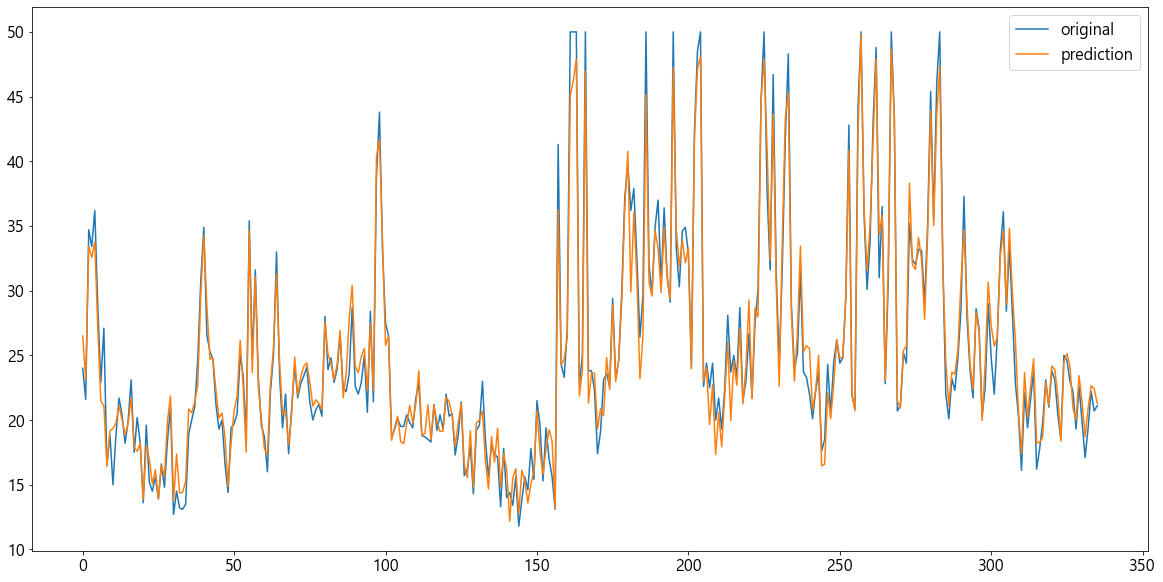

In [25]:
y_pred1 = voting1.predict(X)

plt.plot(y, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.show()


In [26]:
df2 = pd.read_csv('data/boston_new.csv')

scaled_data = scaler1.transform(df2)

y_pred1 = voting1.predict(scaled_data)

df2['target'] = y_pred1
df2.to_csv('data/boston_Voting.csv')

print('저장완료')


저장완료
